# Random Forest

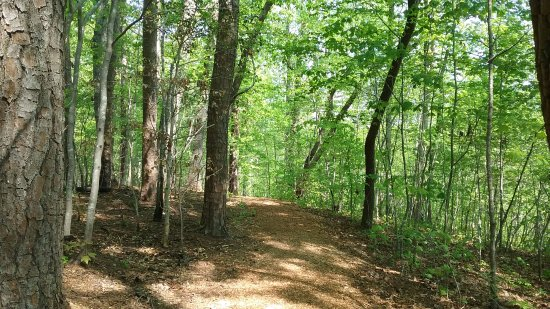

<center>
<i>A picture of a random forest</i>
</center>

## Introduction

<p style="line-height:1.75;font-size:16px">
Random forest is an <b>ensemble</b> learning method for classificatio and regression. The "forest" it builds, is made up of several decision trees, usually trained with the bagging method (more on that later). The thought is that a combination of learning models increases the overall result when compared to a single model.

## How it works

<p style="line-height:1.75;font-size:16px">
The model trains a large number of <b>relatively uncorrelated</b> decision trees. When a new input comes in, each one of the trees gives it own prediction. Then, the prediction with the majority of votes is selected and given as output by the model. This is, in essence, the machine learning version of 'wisdom of the crowd'.

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
Why do we need this requirement of low correlation between the trees?
</p></div>

<p style="line-height:1.75;font-size:16px">
The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction.

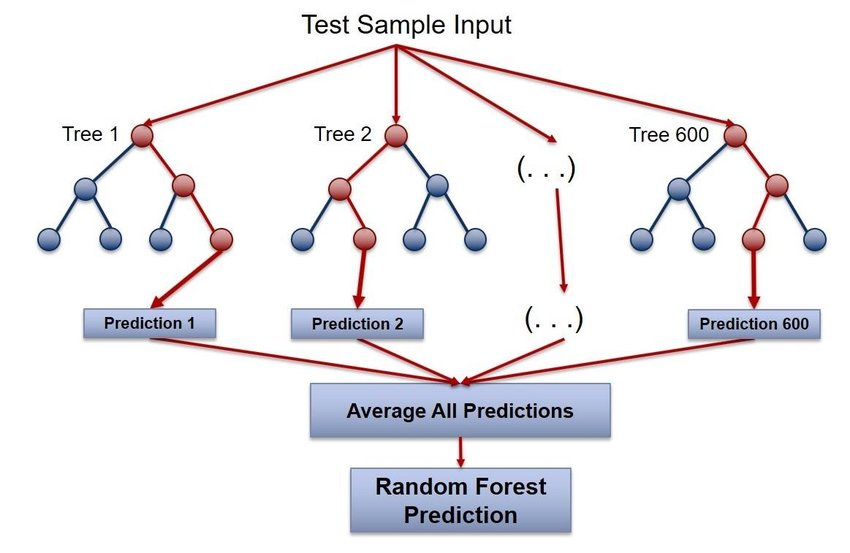

## Bootstrapping

<p style="line-height:1.75;font-size:16px">
The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples. Samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.<br>
Estimating a quantity of a population can be done by repeatedly taking small samples, calculating the statistic, and taking the average of the calculated statistics. 
<p style="line-height:1.75;font-size:16px">
<b>What is it good for?</b><br>
Let’s say we want to find the mean height of all the students in a school (which has a total population of 1,000). 
One approach would be to measure the height of all the students and then compute the mean height. 
However, this would be a tedious task. We would have to individually measure the heights of 1,000 students and then compute the mean height. This is where bootstrap sampling (bootstrapping) comes into play.<br>
Instead of measuring the heights of all the students, we can draw a random sample of 5 students and measure their heights. We would repeat this process 20 times and then average the collected height data of 100 students (5x20). This average height would be an estimate of the mean height of all the students of the school.

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
You are the mayor of Bootstrapia, a town with a population of 100,000 and suprisingly good hummus. You get a sense that each year the population seems a little bit taller so you've decided to measure the height of every person in town in order to calculate their mean height. Unfortunately, you only trust your own tape measure so measuring everyone could be a lengthy process. How could you calculate the mean height without measuring too many people?
</p></div>

<p style="line-height:1.75;font-size:16px">
We could you bootstrapping in order to get a good estimate of the actual mean height! 

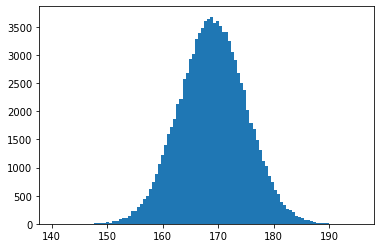

In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Construct the population 
x = np.random.normal(loc=169, scale=6.0, size=100000)

fig = plt.figure()
ax = fig.gca()
ax.hist(x, bins=100)
plt.show()

In [96]:
print(f'Population Mean: {np.mean(x)}\nPopulation Standard Deviation: {np.std(x)}')

Population Mean: 169.00742084755242
Population Standard Deviation: 5.975650056670574


In [99]:
sample_mean = []
sample_std = []

# Create 100 bootstrap of size 10 
for _ in range(100):
    sample = np.random.choice(x, 10)
    mean = np.mean(sample)
    std = np.std(sample)
    sample_mean.append(mean)
    sample_std.append(std)

In [100]:
print(f'Sample Mean: {np.mean(sample_mean)}\nSample Standard Deviation: {np.mean(sample_std)}')

Sample Mean: 169.02721996348006
Sample Standard Deviation: 5.473757211178224


<p style="line-height:1.75;font-size:16px">
We can see that the mean and standard deviation of the bootstrapped examples are fairly close to population's actual values. 

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>Bootstrapping</b></span><br>
There's a lot more to bootstrapping then what we can cover in this course like estimating confidence intervals and a model's skill. If you'd like to learn more about it <a href=https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60>this post</a> has a very comprehensive explanation.
</p></div>

## Bagging

<p style="line-height:1.75;font-size:16px">
Bagging, short for bootstrap aggregating, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method.<br>
The bagging algorithm is very simple:<br>
<span style="line-height:1.75;font-size:16px">
1\. Generate $B$ bootstrap samples<br>
2\. For each bootstrap sample:<br>
&nbsp;&nbsp;&nbsp;&nbsp;2\.1\. Train a decision tree using only a subset of the available features at each step.<br>
3\. In order to classify a new example, get a separate predicition from each tree and average them to get a final prediction.
<p style="line-height:1.75;font-size:16px">

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px"><i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Time to implement your own random forest! Using the titanic dataset, implement your own random forest model by training DecisionTreeClassifiers on bootstrapped samples. Then, use a test set to measure your model's accuracy. Play around with different values for the bootstrap samples and parameters for the decision trees.
</p>
</div>

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('data/titanic.csv')

data.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)
data.dropna(inplace=True)
data = pd.get_dummies(data)
data

train, test = train_test_split(data, train_size=0.8)

bootstrap = [train.sample(frac=0.6, replace=True) for i in range(100)]

clfs = []
features_list = []
for bs in bootstrap:
    features = bs.drop('Survived', axis=1).sample(frac=0.5, axis=1)
    features_list.append(features.columns)
    dt = DecisionTreeClassifier()
    dt.fit(features, bs['Survived'])
    clfs.append(dt)
    
    
# new sample
sample = test.sample(1)
print(sample)
predictions = []
for i, tree in enumerate(clfs):
    predictions.append(tree.predict(sample[features_list[i]]))
print('Passenger survived' if np.mean(predictions) > 0.5 else 'Passenger didn''t survive')

     Survived  Pclass   Age  SibSp  Parch   Fare  Sex_female  Sex_male  \
626         0       2  57.0      0      0  12.35           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
626           0           1           0  
Passenger didnt survive


## Pros & Cons

<p style="line-height:1.75;font-size:16px">
<b>Pros</b><br>
1\. All the advantages of a decision tree (regression + classification, numerical + categorical data, feature selection) with a lower risk of overfitting. <br>
2\. High accuracy and good balance between bias and variance.<bR>
<p style="line-height:1.75;font-size:16px">
<b>Cons</b><br>
1\. Harder to interpret. <br>
2\. Computationally expensive for large datasets.

## Random Forest with SKLearn

In [236]:
import pandas as pd

data = pd.read_csv('./data/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [237]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

data.dropna(subset=['Embarked'], inplace=True)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data['Age'] = imp.fit_transform(data['Age'].values.reshape(-1,1))

le = LabelEncoder()
le.fit(data['Embarked'])
data['Embarked'] = le.transform(data['Embarked'])

data['Sex'] = data['Sex'].apply(lambda x: 1 if x=='female' else 0)
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'])

In [245]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=3)
rf.fit(X_train, y_train)
print(f'Train Score: {rf.score(X_train, y_train)}\nTest Score: {rf.score(X_test, y_test)}')

Train Score: 0.8228228228228228
Test Score: 0.7982062780269058
